In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"almaty_flats.csv"

data= pd.read_csv(filepath, sep=";")

# Printing the data
data.head(10)

,price,rooms,area,floor,street,city,ZHK,type,year,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,от 42 042 000〒,"3-комнатная квартира, 100.1 м²",NaN,NaN,"Бостандыкский р-н, Торайгырова — Мустафина",Алматы,жил. комплекс Sholpan City,12 этажей,2019 г.п.,жил. площадь 43.6 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17 000 000〒,"1-комнатная квартира, 41 м², 7/8 этаж",NaN,NaN,"Медеуский р-н, Тулебаева — Макатаева",Алматы,панельный дом,1974 г.п.,состояние: среднее,жил. площадь 19 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,от 143 390 000〒,"4-комнатная квартира, 220.6 м²",NaN,NaN,"Медеуский р-н, Рубинштейна 21А",Алматы,жил. комплекс Клубный дом DeVille,10 этажей,2017 г.п.,потолки 3.4м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17 000 000〒,"2-комнатная квартира, 44 м², 2/5 этаж",NaN,NaN,"Алмалинский р-н, Радостовца — Карасай Батыра",Алматы,панельный дом,1978 г.п.,состояние: хорошее,жил. площадь 28 кв.м.,...,рядом все,что сделает Вашу…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 000 000〒,"1-комнатная квартира, 33.5 м², 3/5 этаж",NaN,NaN,"Ауэзовский р-н, мкр Таугуль 9 — Факельная Пятн...",Алматы,панельный дом,1988 г.п.,состояние: евроремонт,жил. площадь 17.6 кв.м.,...,детская площадка во дворе,Чистый подъезд. автобусы ходят во все направл...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7 300 000〒,"1-комнатная квартира, 24 м², 3/9 этаж",NaN,NaN,"Ауэзовский р-н, мкр Аксай-1А 28а — Толе би - Я...",Алматы,монолитный дом,2010 г.п.,состояние: хорошее,потолки 2.8м.,...,электроэнергия,все центрально…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12 500 000〒,"1-комнатная квартира, 24 м², 7/10 этаж",NaN,NaN,"Алатауский р-н, Райымбека 481/1",Алматы,жил. комплекс Акниет,монолитный дом,2018 г.п.,состояние: хорошее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47 000 000〒,"3-комнатная квартира, 80 м², 5/10 этаж",NaN,NaN,"Алмалинский р-н, Казыбек би — Досмухамедова",Алматы,жил. комплекс Мечта на Казыбек би,монолитный дом,2015 г.п.,состояние: евроремонт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13 000 000〒,"1-комнатная квартира, 40 м², 5/6 этаж",NaN,NaN,"Жетысуский р-н, мкр Кокжиек 33",Алматы,монолитный дом,2006 г.п.,потолки 2.8м.,санузел совмещенный,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11 000 000〒,"2-комнатная квартира, 38 м², 2/2 этаж",NaN,NaN,"Алатауский р-н, мкр АДК, Кисловодская — Левского",Алматы,кирпичный дом,1971 г.п.,состояние: евроремонт,жил. площадь 25 кв.м.,...,туалетом и ванной! Район Ташкентская - Емцова...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [573]:
#checking null values in columns
data.isnull().sum()

price              0
rooms              0
area           20001
floor          20001
street             0
city               0
ZHK                0
type               8
year              53
Unnamed: 9       184
Unnamed: 10      549
Unnamed: 11     1283
Unnamed: 12     2416
Unnamed: 13     4185
Unnamed: 14     6547
Unnamed: 15     8807
Unnamed: 16    11258
Unnamed: 17    13678
Unnamed: 18    15580
Unnamed: 19    17120
Unnamed: 20    18166
Unnamed: 21    18988
Unnamed: 22    19520
Unnamed: 23    19829
Unnamed: 24    19951
Unnamed: 25    19989
Unnamed: 26    20000
dtype: int64

In [574]:
#clean price column, remove unnecessary characters and convert to int 
data['price'] = data['price'].str.replace('〒','')
data['price'] = data['price'].str.replace('от ','')
data['price'] = data['price'].str.replace(' ','')
data['price'] = data['price'].astype(int)
print(data['price'])

0         42042000
1         17000000
2        143390000
3         17000000
4         18000000
           ...    
19996     55000000
19997     28000000
19998     22000000
19999     32500000
20000     26500000
Name: price, Length: 20001, dtype: int32


In [575]:
#clear area column, change type to float
data['area'] = data['rooms'].str.split(', ').str[1].str.split().str[0].astype(float)
print(data['area'])

0        100.1
1         41.0
2        220.6
3         44.0
4         33.5
         ...  
19996    130.0
19997     88.0
19998     64.0
19999     72.0
20000     65.0
Name: area, Length: 20001, dtype: float64


In [576]:
#clear floor column, change null values to average 3 floor out 5 and convert it into coefficent by deviding, so the less coef 
# the lower the floor 
data['floor'] = data['rooms'].str.split(', ').str[2].str.split().str[0]
data['floor'].fillna("3/5",inplace=True)
data['floor_coef']=data['floor'].str.split('/').str[0].astype(float)/data['floor'].str.split('/').str[1].astype(float)
print(data['floor_coef'])

0        0.600000
1        0.875000
2        0.600000
3        0.400000
4        0.600000
           ...   
19996    0.857143
19997    0.222222
19998    0.600000
19999    0.666667
20000    0.600000
Name: floor_coef, Length: 20001, dtype: float64


In [577]:
#clear rooms column and convert to int value
data['rooms'] = data['rooms'].str.split(', ').str[0].str[0].astype(int)
print(data['rooms'])

0        3
1        1
2        4
3        2
4        1
        ..
19996    3
19997    3
19998    3
19999    3
20000    3
Name: rooms, Length: 20001, dtype: int32


In [578]:
#create new column destrict from street for better analysys
data = data[data['street'].str.split(',').str[0].str.split().str[1] == 'р-н']
data['district'] = data['street'].str.split(',').str[0]
data['district']

0        Бостандыкский р-н
1            Медеуский р-н
2            Медеуский р-н
3          Алмалинский р-н
4           Ауэзовский р-н
               ...        
19996    Бостандыкский р-н
19997       Алатауский р-н
19998       Ауэзовский р-н
19999    Бостандыкский р-н
20000      Алмалинский р-н
Name: district, Length: 19629, dtype: object

In [579]:
# remove row without year of house
data = data[(data['type'].str.split().str[-1] == 'г.п.') | (data['ZHK'].str.split().str[-1] == 'г.п.') | (data['year'].str.split().str[-1] == 'г.п.')]

In [580]:
#take year values from type column
type_year = data.loc[data['type'].str.split().str[-1] == 'г.п.']
type_year['type'].head(5)

1     1974 г.п.
3     1978 г.п.
4     1988 г.п.
5     2010 г.п.
8     2006 г.п.
Name: type, dtype: object

In [581]:
#take year values from ZHK column
ZHK_year = data.loc[data['ZHK'].str.split().str[-1] == 'г.п.']
ZHK_year['ZHK'].head(5)

10    1976 г.п.
13    2015 г.п.
16    1980 г.п.
74    1972 г.п.
99    1979 г.п.
Name: ZHK, dtype: object

In [582]:
#take year values from year column
year = data.loc[data['year'].str.split().str[-1] == 'г.п.']

In [583]:
#concatinate values of year 
result = pd.concat([ZHK_year['ZHK'],type_year['type']]).sort_index()
result = pd.concat([result,year['year']]).sort_index()
result = result.str.split().str[0].astype(int)
result

0        2019
1        1974
2        2017
3        1978
4        1988
         ... 
19996    2010
19997    2015
19998    1982
19999    1990
20000    1970
Length: 19282, dtype: int32

In [584]:
#putting result of finding year from other columns to year column
data['year'] = result
data.head(10)

,price,rooms,area,floor,street,city,ZHK,type,year,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,floor_coef,district
0,42042000,3,100.1,3/5,"Бостандыкский р-н, Торайгырова — Мустафина",Алматы,жил. комплекс Sholpan City,12 этажей,2019,жил. площадь 43.6 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,Бостандыкский р-н
1,17000000,1,41.0,7/8,"Медеуский р-н, Тулебаева — Макатаева",Алматы,панельный дом,1974 г.п.,1974,жил. площадь 19 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875000,Медеуский р-н
2,143390000,4,220.6,3/5,"Медеуский р-н, Рубинштейна 21А",Алматы,жил. комплекс Клубный дом DeVille,10 этажей,2017,потолки 3.4м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,Медеуский р-н
3,17000000,2,44.0,2/5,"Алмалинский р-н, Радостовца — Карасай Батыра",Алматы,панельный дом,1978 г.п.,1978,жил. площадь 28 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,Алмалинский р-н
4,18000000,1,33.5,3/5,"Ауэзовский р-н, мкр Таугуль 9 — Факельная Пятн...",Алматы,панельный дом,1988 г.п.,1988,жил. площадь 17.6 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,Ауэзовский р-н
5,7300000,1,24.0,3/9,"Ауэзовский р-н, мкр Аксай-1А 28а — Толе би - Я...",Алматы,монолитный дом,2010 г.п.,2010,потолки 2.8м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,Ауэзовский р-н
6,12500000,1,24.0,7/10,"Алатауский р-н, Райымбека 481/1",Алматы,жил. комплекс Акниет,монолитный дом,2018,состояние: хорошее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,Алатауский р-н
7,47000000,3,80.0,5/10,"Алмалинский р-н, Казыбек би — Досмухамедова",Алматы,жил. комплекс Мечта на Казыбек би,монолитный дом,2015,состояние: евроремонт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,Алмалинский р-н
8,13000000,1,40.0,5/6,"Жетысуский р-н, мкр Кокжиек 33",Алматы,монолитный дом,2006 г.п.,2006,санузел совмещенный,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,Жетысуский р-н
9,11000000,2,38.0,2/2,"Алатауский р-н, мкр АДК, Кисловодская — Левского",Алматы,кирпичный дом,1971 г.п.,1971,жил. площадь 25 кв.м.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,Алатауский р-н


In [585]:
#drop unneessary columns
#we dropped ZHK and street values becouse we have district column which is better representation for predicting price
data = pd.DataFrame(data,columns = ['price','rooms','area','floor_coef','district','year'])
data.head(10)

,price,rooms,area,floor_coef,district,year
0,42042000,3,100.1,0.600000,Бостандыкский р-н,2019
1,17000000,1,41.0,0.875000,Медеуский р-н,1974
2,143390000,4,220.6,0.600000,Медеуский р-н,2017
3,17000000,2,44.0,0.400000,Алмалинский р-н,1978
4,18000000,1,33.5,0.600000,Ауэзовский р-н,1988
5,7300000,1,24.0,0.333333,Ауэзовский р-н,2010
6,12500000,1,24.0,0.700000,Алатауский р-н,2018
7,47000000,3,80.0,0.500000,Алмалинский р-н,2015
8,13000000,1,40.0,0.833333,Жетысуский р-н,2006
9,11000000,2,38.0,1.000000,Алатауский р-н,1971


In [586]:
#convert each district of Almaty to numeric value
data['district'].loc[data.district == 'Бостандыкский р-н'] = 7
data['district'].loc[data.district == 'Медеуский р-н'] = 8
data['district'].loc[data.district == 'Алмалинский р-н'] = 6
data['district'].loc[data.district == 'Ауэзовский р-н'] = 5
data['district'].loc[data.district == 'Жетысуский р-н'] = 1
data['district'].loc[data.district == 'Алатауский р-н'] = 3
data['district'].loc[data.district == 'Турксибский р-н'] = 2
data['district'].loc[data.district == 'Наурызбайский р-н'] = 4
data['district'] = data['district'].astype(int)

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [587]:
#save csv
data.to_csv(r'cleaned.csv', header=True,index=False)

# Creating prediction model

In [588]:
# remove outliners for better graph and regression
data = data[data['floor_coef'] <= 1.0]
data = data[data['area'] < 250.0]
data = data[data['price'] < 150000000]
data

,price,rooms,area,floor_coef,district,year
0,42042000,3,100.1,0.600000,7,2019
1,17000000,1,41.0,0.875000,8,1974
2,143390000,4,220.6,0.600000,8,2017
3,17000000,2,44.0,0.400000,6,1978
4,18000000,1,33.5,0.600000,5,1988
...,...,...,...,...,...,...
19996,55000000,3,130.0,0.857143,7,2010
19997,28000000,3,88.0,0.222222,3,2015
19998,22000000,3,64.0,0.600000,5,1982
19999,32500000,3,72.0,0.666667,7,1990


In [589]:
#import libraries for regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [590]:
#we will predict price from those data columns
X = data[['area','district','rooms','floor_coef','year']]
Y = data['price']

In [591]:
#devide data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.3, 
                                                    random_state=1)

In [592]:
model=LinearRegression()

In [593]:
#use train values for training
model.fit(X_train,y_train)

LinearRegression()

In [594]:
#predict
pred=model.predict(X_test)
print('Linear Regression R squared": %.4f' % model.score(X_test, y_test))

Linear Regression R squared": 0.7993


In [595]:
from sklearn.ensemble import RandomForestRegressor

In [596]:
#predicting but using RandomForest alghoritm
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [597]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8888


In [598]:
data.corr(method='pearson')

,price,rooms,area,floor_coef,district,year
price,1.000000,0.583249,0.864257,-0.072218,0.375961,0.421464
rooms,0.583249,1.000000,0.746386,-0.027855,0.165634,0.062952
area,0.864257,0.746386,1.000000,-0.057231,0.207682,0.425858
floor_coef,-0.072218,-0.027855,-0.057231,1.000000,-0.028267,-0.111948
district,0.375961,0.165634,0.207682,-0.028267,1.000000,-0.053811
year,0.421464,0.062952,0.425858,-0.111948,-0.053811,1.000000


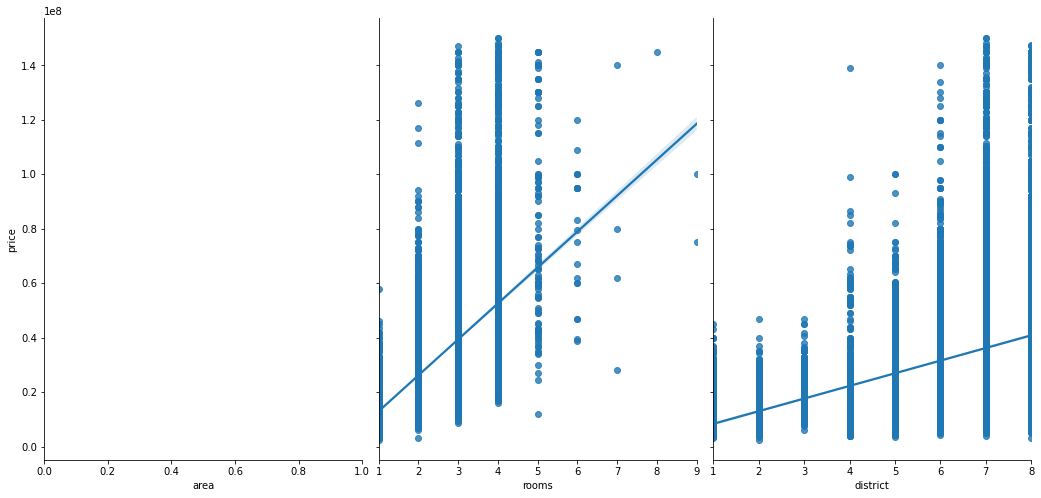

In [599]:
sns.pairplot(data, x_vars=['area','rooms','district'], y_vars='price', height=7, aspect=0.7, kind='reg')

# Some visualizations

In [11]:
df = pd.read_csv('cleaned.csv')
df.head(10)

,price,rooms,area,floor_coef,district,year
0,42042000,3,100.1,0.600000,1,2019
1,17000000,1,41.0,0.875000,2,1974
2,143390000,4,220.6,0.600000,2,2017
3,17000000,2,44.0,0.400000,3,1978
4,18000000,1,33.5,0.600000,4,1988
5,7300000,1,24.0,0.333333,4,2010
6,12500000,1,24.0,0.700000,6,2018
7,47000000,3,80.0,0.500000,3,2015
8,13000000,1,40.0,0.833333,5,2006
9,11000000,2,38.0,1.000000,6,1971


In [4]:
df[df['price'] >= 100000000].sort_values('price', ascending=False)
df.price = df.price/1000

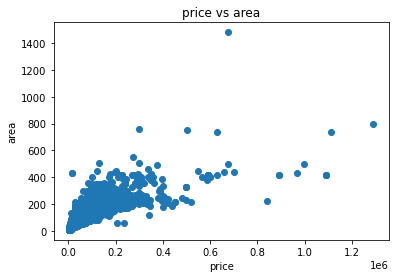

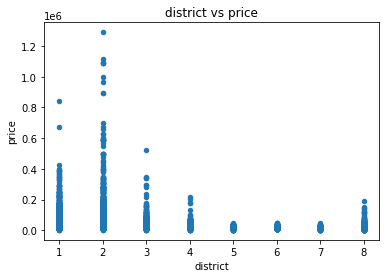

In [5]:
plt.scatter(df.price,df.area)
plt.title("price vs area")
plt.ylabel("area")
plt.xlabel("price")
plt.show()

df.plot.scatter(x="district",y="price")
plt.title("district vs price")
plt.show()

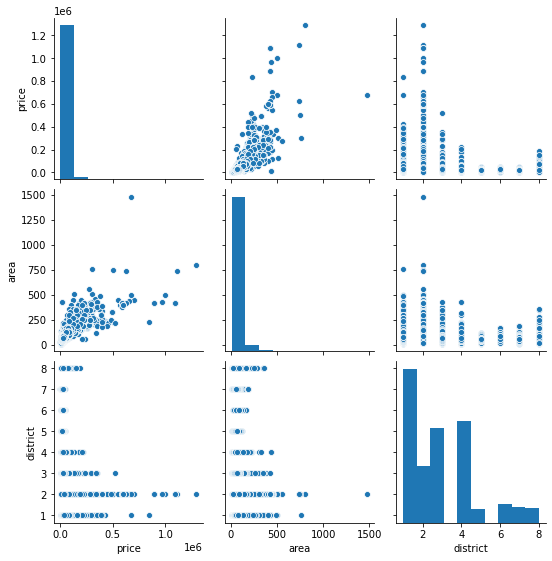

In [6]:
sns.pairplot(data = df, vars=['price','area','district'])
plt.show()

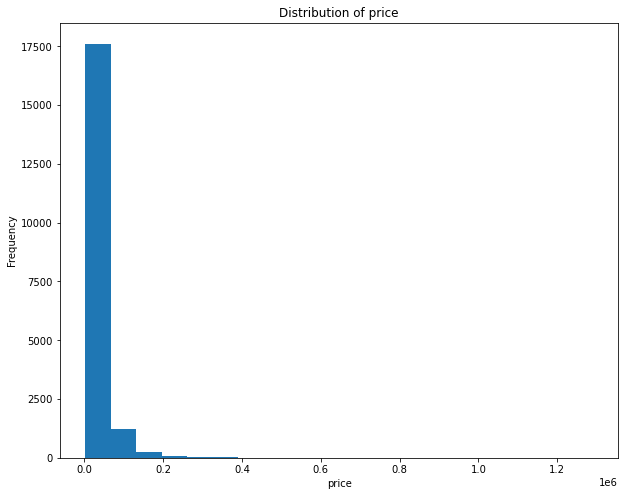

In [7]:
plt.figure(figsize=[10,8])
plt.hist(df.price, bins=20)
plt.gca().set(title='Distribution of price', xlabel='price', ylabel='Frequency');

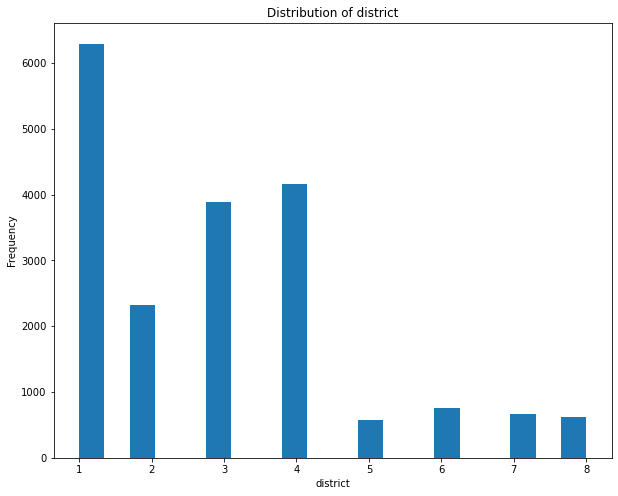

In [8]:
plt.figure(figsize=[10,8])
plt.hist(df.district, bins=20)
plt.gca().set(title='Distribution of district', xlabel='district', ylabel='Frequency');

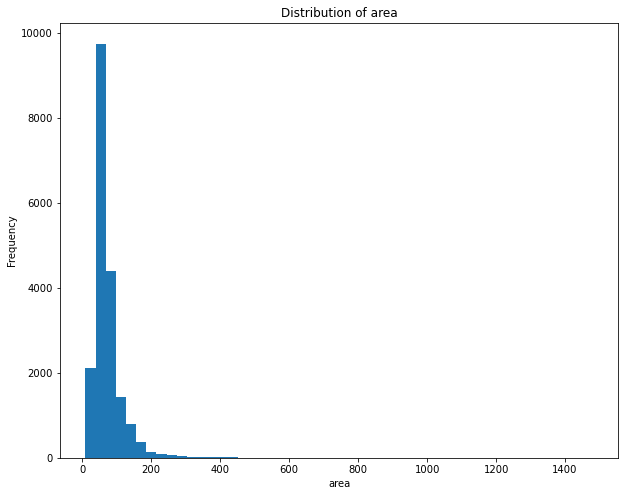

In [9]:
plt.figure(figsize=[10,8])
plt.hist(df.area, bins=50)
plt.gca().set(title='Distribution of area', xlabel='area', ylabel='Frequency');

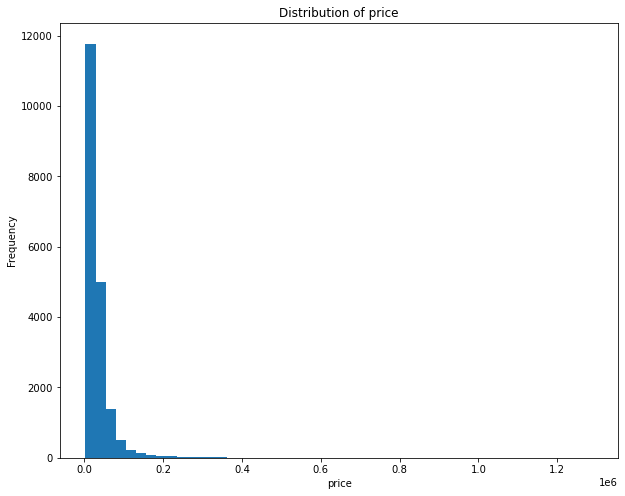

In [10]:
plt.figure(figsize=[10,8])
plt.hist(df.price, bins=50)
plt.gca().set(title='Distribution of price', xlabel='price', ylabel='Frequency');